C:\Users\BIEMAL\AppData\Local\Temp\ipykernel_12924\3386784359.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


AttributeError: 'DataFrame' object has no attribute 'boundary'

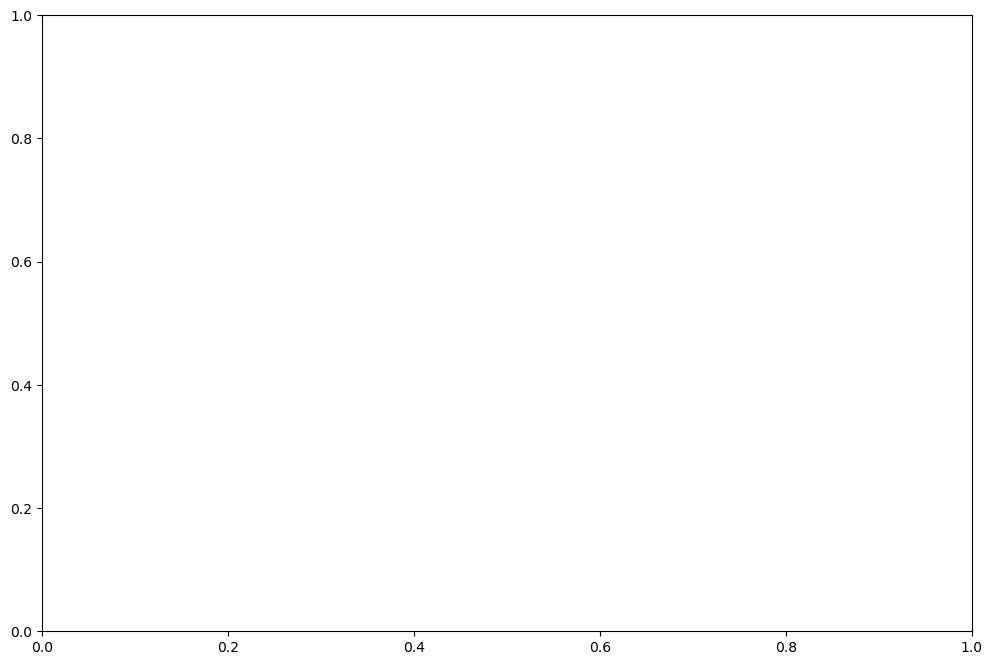

In [7]:
# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot the European countries with sizes reflecting the '2030 target' column
world.boundary.plot(ax=ax, linewidth=0.5)
world.plot(column='2022 proxy', ax=ax, legend=True, legend_kwds={'label': "2022 proxy"})

# Set a title for the map
plt.title("Share of energy from renewable sources used in transport by country")

# Show the map
plt.show()


In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
# Load the shapefile of European countries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={'name': 'Country'})  # Rename 'name' to 'Country'

# Load your data containing the percentage of electricity usage from renewable sources
# Make sure it includes a 'Country' column and a 'Renewable Percentage' column
# Replace 'your_data.csv' with your actual data source
data = gpd.read_file('share-of-energy-from-renewable.csv')
data = data.rename(columns=lambda x: x.split(':')[0])  # Remove everything after colon in column names

# Merge the data with the country geometries
world = world.merge(data, on='Country')
world_filtered = world[world['Year'] == '2022 proxy'][['Country', 'Value', 'geometry_x']].rename(columns={'geometry_x': 'geometry'})
world_filtered['Value'] = pd.to_numeric(world_filtered['Value'], errors='coerce')

C:\Users\BIEMAL\AppData\Local\Temp\ipykernel_12924\2635191315.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


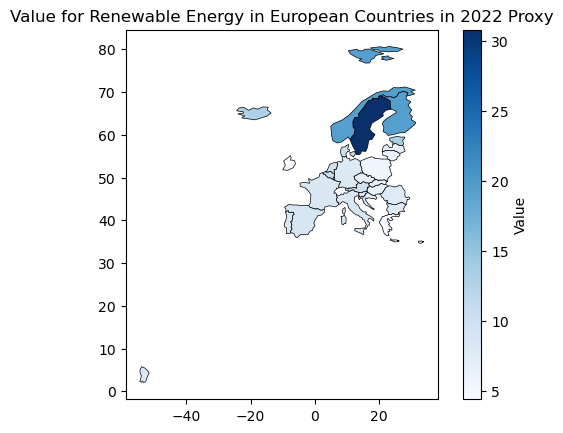

In [35]:
baseline_value = 14
world_filtered['size'] = world_filtered['Value'].apply(lambda x: 1.2 if x > baseline_value else 0.8)

# Create a GeoDataFrame for plotting
gdf = gpd.GeoDataFrame(world_filtered, geometry='geometry')

# Plot the European countries with sizes reflecting the 'Value' column
gdf.plot(column='Value', cmap='Blues', edgecolor='k', linewidth=0.5, legend=True, legend_kwds={'label': "Value"})

# Set a title for the map
plt.title("Value for Renewable Energy in European Countries in 2022 Proxy")

# Show the map
plt.show()

In [38]:
world_filtered.to_csv("countries.csv")